Dataset Link : https://www.kaggle.com/snap/amazon-fine-food-reviews

In [ ]:
!gdown --id 1WCmb5JyfGpL3YEJFTxCTzdv12ODmjF1O

Downloading...
From: https://drive.google.com/uc?id=1WCmb5JyfGpL3YEJFTxCTzdv12ODmjF1O
To: /content/Reviews.csv
100% 301M/301M [00:07<00:00, 39.2MB/s]


In [ ]:
import pandas as pd
import time

In [ ]:
df = pd.read_csv("Reviews.csv")

In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


# **Description of Attributes**

1. **Id** - Row Id

2. **ProductId** - Unique identifier for the product

3. **UserId** - Unique identifier for the user

4. **ProfileName** - Profile name of the user

5. **HelpfulnessNumerator** - Number of users who found the review helpful

6. **HelpfulnessDenominator** - Number of users who indicated whether they found the review helpful or not

7. **Score** - Rating between 1 and 5

8. **Time** - Timestamp for the review

9. **Summary** - Brief summary of the review

10. **Text** - Text of the review

#**Exploratory Data Analysis**

In [ ]:
print("The number of reviews present in the file :",df.shape[0])
print("The number of unique users who have reviewed :",df["UserId"].nunique())
print("The number of unique products which has been reviewed :",df["ProductId"].nunique())
more_than_50_reviews = df.groupby("UserId").size().where(lambda x:x>50).count()
print("Users with more than 50 reviews :",more_than_50_reviews)
timeline = f"{time.strftime('%b %Y', time.localtime(df['Time'].min()))} - {time.strftime('%b %Y', time.localtime(df['Time'].max()))}"
print("The timeline of reviews :",timeline)

The number of reviews present in the file : 568454
The number of unique users who have reviewed : 256059
The number of unique products which has been reviewed : 74258
Users with more than 50 reviews : 260
The timeline of reviews : Oct 1999 - Oct 2012


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df_shape = df.shape
print("No. of Datapoints :",df_shape[0])
print("No. of Features :",df_shape[1])

No. of Datapoints : 568454
No. of Features : 10


## Data points with missing values

In [ ]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

There are missing values in the dataset let's check them out

### Peak the datapoints having 'ProfileName' Feature as Null

In [ ]:
with pd.option_context('display.max_colwidth', -1):
    display(df[df["ProfileName"].isnull()].head(1))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
25509,25510,B000LKZB4Y,A36BVYD0NT7Z0F,NaN,0,0,5,1314576000,These are the best mints and no aspartame or BHT,I was so shocked to find out that almost all gums have BHT. I went to the health food store and got gum with Xylitol but I didn't like the taste. B Fresh was the only one with Xylitol that didn't taste like aspartame. I saw Newmans Own Organic Mints and was happy to see no aspartame or BHT and they are really good. I hope the company starts making gum. The only problem is the mints are made in Mexico. What is the matter Americans can't make mints?


**Observation** : Eventhough Profile Name is missing, user ID remains intact which uniquely allows you to identify every user so no need to drop them.

### Peak the datapoints having 'Summary' Feature as Null

In [ ]:
with pd.option_context('display.max_colwidth', -1):
    display(df[df["Summary"].isnull()].head(2))

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
33958,33959,B00412W76S,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either."
40548,40549,B00020HHRW,A3TJPSWY2HE4BS,"S. Layton ""homeschool blogger""",1,24,2,1173312000,NaN,"I only used two maybe three tea bags and got pregnant - can not drink during pregnancy. Not a bad taste, but I'm not a big tea fan either."


**Observations**:

1. The sample reviews above dont have a summary/title. But nothing to be concerned about since the 'text' corresponding to it is present, which may provide much more info about the review context/message.
2. On a closer look, their text(review) attribute are all duplicated.
3. Everything except the 'ProductId' are same, even time. 
4. So, we may safely presume that when a product has different variants(stock-keeping unit (SKU)), review written for any one of the variant gets replicated for all the other variants and Each Product-Variant Combo gets assigned a different ProductId.
5. We may delete the duplicated data in further steps. 

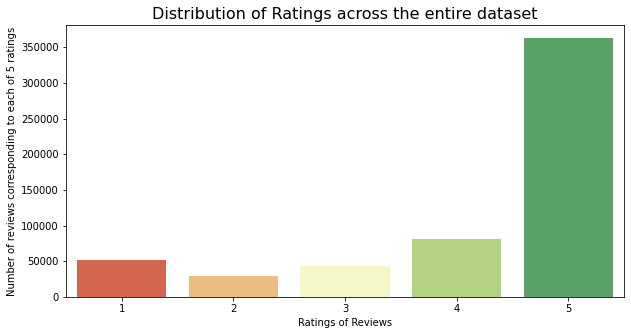

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(10,5))
sns.countplot(df['Score'], palette=sns.color_palette("RdYlGn", 5))
plt.title("Distribution of Ratings across the entire dataset", fontsize=16)
plt.xlabel("Ratings of Reviews")
plt.ylabel("Number of reviews corresponding to each of 5 ratings")
plt.show();

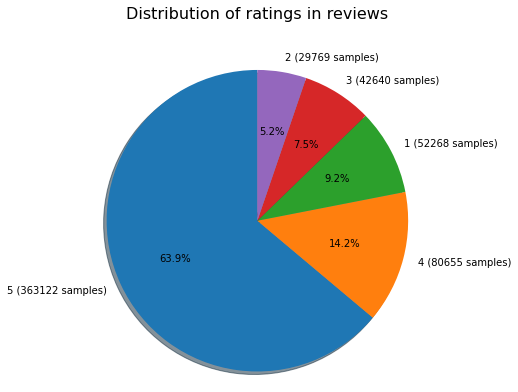

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Score"].value_counts()[k]} samples)' for k in df['Score'].value_counts().keys()]
sizes = dict(df['Score'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title("Distribution of ratings in reviews",pad=40, fontsize=16)
plt.show();

**Observation**:

1. ~78 percent of the reviews in the dataset are positive reviews having ratings >3 (4 and 5)
2. ~14 percent of the reviews in the dataset are negative reviews having ratings <3 (1 and 2)
3. Remaining ~8 percent reviews have a rating of 3.
4. Since a major portion of the reviews are positive, we can say that most of the users have a good experience with their purchases.

# **Data Cleaning**

## Check and Delete Duplicate Reviews

In [ ]:
mask_duplicated_reviews = df.duplicated(subset=["UserId","Time","Text"], keep='first')
count_duplicated_reviews = mask_duplicated_reviews.value_counts()

sum_reviews = count_duplicated_reviews.sum()
perc_duplicated_reviews = (count_duplicated_reviews/sum_reviews) * 100

print("Count of duplicated reviews",count_duplicated_reviews[True])
print("Percentage of duplicated reviews",round(perc_duplicated_reviews[True],2),"%")
print("Count of original reviews",count_duplicated_reviews[False])
print("Count of original reviews",round(perc_duplicated_reviews[False],2),"%")


Count of duplicated reviews 174562
Percentage of duplicated reviews 30.71 %
Count of original reviews 393892
Count of original reviews 69.29 %


**Observation**:
We have about 1.75 lakh reviews(~30% of total reviews) which are duplicated across product variants. Basically reviews by the same user at the same time with same review text.

In [ ]:
#Updating dataframe to include only original(non-duplicated) reviews
df = df[~mask_duplicated_reviews]
print("Updated number of Datapoints :",df.shape[0])

Updated number of Datapoints : 393892


## Check and Remove 3 Star(Neutral) Reviews

### Count and Proportion of 3 star reviews

In [ ]:
print("Number of three star reviews :",df[df['Score']==3].shape[0])
print("Percentage of three star reviews :",round((df[df['Score']==3].shape[0]/df.shape[0])*100,2))

Number of three star reviews : 29768
Percentage of three star reviews : 7.56


We will build a model which will tag an unseen review as positive or negative. If the scores were between 1 and 10(inclusive), we could have assigned the class label as 'Negative' for reviews with scores [1,2,3,4,5] and 'Positive' for reviews with scores [6,7,8,9,10]. But here since we have scores between 1 and 5(inclusive), we don't have an option to divide the scores in two equal classes. If we were to do that either all the reviews with score of 3 had to be discarded(then reviews with scores [1,2] would fall in 'Negative' class and [4,5] would fall in 'Positive' class) or we could take a decision to either include score '3' reviews in either 'Negative' or 'Positive' Class. Or we could make this a Multiclass Classification Problem (Negative, Neutral and Positive) instead of the current Binary Classification Problem.

### Peak the datapoints having a 'Score' of 3

In [ ]:
df_review_3 = df[df["Score"]==3].loc[:,["Id","Score","Text"]]
with pd.option_context('display.max_colwidth', -1):
    display(df_review_3.head(10))

,Id,Score,Text
45,46,3,"This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either. It didn't pass muster with my kids, so I probably won't buy it again."
47,48,3,"The flavors are good. However, I do not see any differce between this and Oaker Oats brand - they are both mushy."
49,50,3,This is the same stuff you can buy at the big box stores. There is nothing healthy about it. It is just carbs and sugars. Save your money and get something that at least has some taste.
53,54,3,we're used to spicy foods down here in south texas and these are not at all spicy. doubt very much habanero is used at all. could take it up a notch or two.
60,61,3,"Watch your prices with this. While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target."
68,69,3,"If you're impulsive like me, then $6 is ok. Don't get me wrong, the quality of these babies is very good and I have no complaints. But in retrospect, the price is a little ridiculous (esp. when you add on the shipping)."
78,79,3,"The taste was great, but the berries had melted. May order again in winter. If you order in cold weather you should enjoy flavor."
83,84,3,"While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients."
84,85,3,"Awesome dog food. However, when given to my ""Boston"", who has severe reactions to some food ingredients; his itching increased to violent jumping out of bed at night, scratching. As soon as I changed to a different formula, the scratching stopped. So glad Natural Balance has other choices. I guess you have to try each, until you find what's best for your pet."
106,107,3,not what I was expecting in terms of the company's reputation for excellent home delivery products


**Observations**:
* For reviews with index 83 and 84, it talks about how the dog food is great and liked by the dog, but it has a side effect of itching with it. Now this may be not be observed by all the users and here in this case we may conclude that the dog may be allergic with an ingredient that goes into the product. Type - **Case Specific**
* For review with index 78, the customer talks about how the product doesnt taste great in hot weather. Type - **Situational**
* For reviews with index 60 and 68, the main concern is about the price of the product which is kind of a secondary aspect about the product. Type - **Price Concern**
* For reviews with index 45, 47, 106, there is something wrong with respect to the product which may be termed as a negative review. Type - **Negative Review**
* For reviews with index 49, 53, Expectation of the user with respect to taste, health, quality were not met by the product which again may be termed as a negative review. Type - **Negative Review**

> * Since we have a mix of Negative Reviews as well as Neutral Reviews, we can't assign them to 'Negative' Class. That leaves us with the option of discarding all the reviews having a Score of 3.


### Discard all reviews having a Score of 3

In [ ]:
print("Number of Datapoints BEFORE discarding :",df.shape[0])

df = df[df["Score"]!=3]

print("Number of Datapoints AFTER discarding :",df.shape[0])


Number of Datapoints BEFORE discarding : 393892
Number of Datapoints AFTER discarding : 364124


## Discarding reviews having inconsistencies

**Helpfulness numerator should not be more than Helpfulness denominator**

In [ ]:
df[df["HelpfulnessNumerator"] > df["HelpfulnessDenominator"]]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


We dropping these two datapoints because of inconsistency

In [ ]:
print("Number of Datapoints BEFORE discarding :",df.shape[0])

df = df[df["HelpfulnessNumerator"] <= df["HelpfulnessDenominator"]]

print("Number of Datapoints AFTER discarding :",df.shape[0])


Number of Datapoints BEFORE discarding : 364124
Number of Datapoints AFTER discarding : 364122


# **Feature Engineering**

### Replacing HelpfulnessNumerator and HelpfulnessDenominator Feature into one feature indicating the HelpfulnessPercentage

In [ ]:
%%time
df["Helpfulness_Perc"] = df[["HelpfulnessNumerator","HelpfulnessDenominator"]].apply(lambda x: ((x[0]/x[1])*100.0) if x[1] else 0.0, axis=1)
df = df.drop(["HelpfulnessNumerator","HelpfulnessDenominator"], axis=1)
df.head()

CPU times: user 3.78 s, sys: 59.9 ms, total: 3.84 s
Wall time: 3.86 s


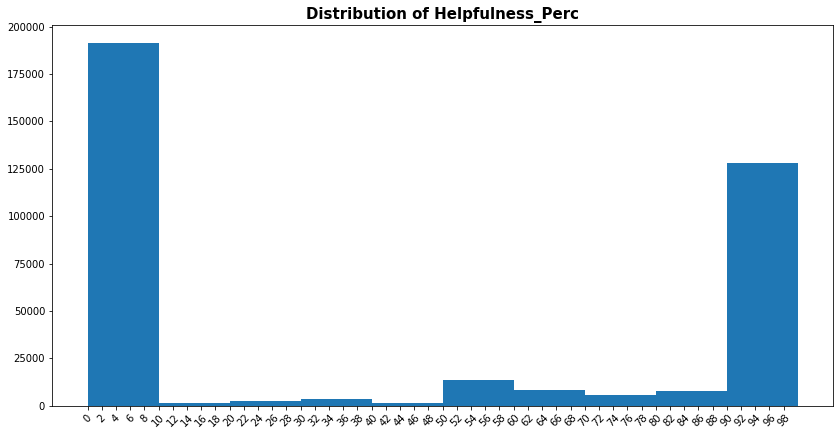

In [ ]:
plt.figure(figsize=(14,7))
plt.hist(df["Helpfulness_Perc"])
plt.title("Distribution of Helpfulness_Perc",fontweight='bold', fontsize=15)
plt.xticks(range(0,100,2), rotation=45)
plt.show();

### Lets create a new feature off of 'Helpfulness_Perc' which will be an indicator of helpfulness basis the helpfulness percentage. This will be a 4-class feature.  

In [ ]:
dictionary = {"Condition" : ["Helpfulness_Perc >= 75","40 < Helpfulness_Perc < 75","0 < Helpfulness_Perc <= 40","Helpfulness_Perc = 0"], "Class" : ["Useful","Intermediate","Not Useful","Not Available"]}
pd.DataFrame(dictionary)

,Condition,Class
0,Helpfulness_Perc >= 75,Useful
1,40 < Helpfulness_Perc < 75,Intermediate
2,0 < Helpfulness_Perc <= 40,Not Useful
3,Helpfulness_Perc = 0,Not Available


In [ ]:
# Assigning Helpfulness indicator
df.loc[df["Helpfulness_Perc"] >= 75, 'Helpfulness_indicator'] = 'Useful'
df.loc[(df["Helpfulness_Perc"] > 40) & (df["Helpfulness_Perc"] < 75), 'Helpfulness_indicator'] = 'Intermediate'
df.loc[(df["Helpfulness_Perc"] > 0) & (df["Helpfulness_Perc"] <= 40), 'Helpfulness_indicator'] = 'Not Useful'
df.loc[df["Helpfulness_Perc"] == 0, 'Helpfulness_indicator'] = 'Not Available'

df = df.drop(["Helpfulness_Perc"], axis=1)

df.head(2)

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_indicator
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Useful
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Not Available


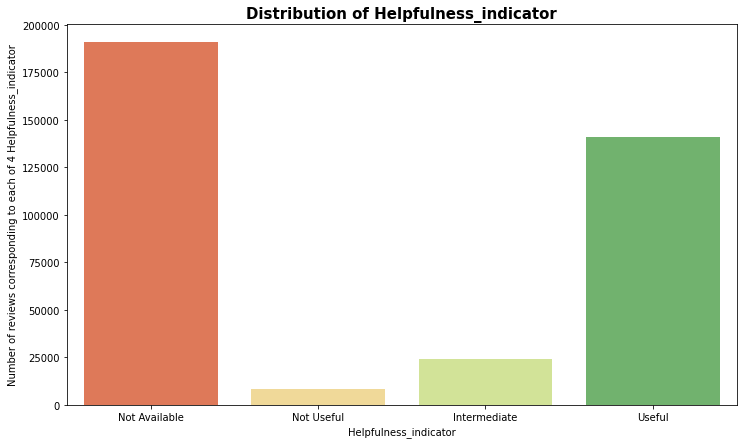

Not Available    190788
Not Useful         8576
Intermediate      23951
Useful           140807
Name: Helpfulness_indicator, dtype: int64


In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['Helpfulness_indicator'], palette=sns.color_palette("RdYlGn", 4), order=["Not Available","Not Useful","Intermediate","Useful"])
plt.title("Distribution of Helpfulness_indicator",fontweight='bold', fontsize=15)
plt.xlabel("Helpfulness_indicator")
plt.ylabel("Number of reviews corresponding to each of 4 Helpfulness_indicator")
plt.show();

print(df['Helpfulness_indicator'].value_counts()[[0,3,2,1]]);

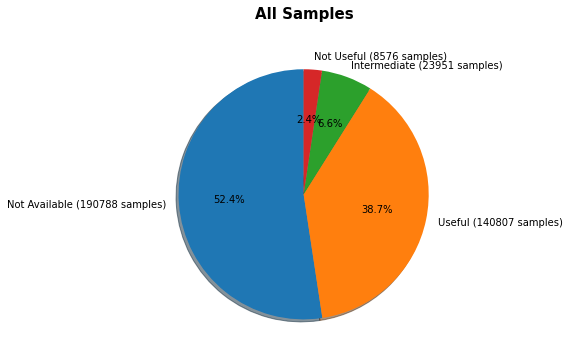

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Helpfulness_indicator"].value_counts()[k]} samples)' for k in df['Helpfulness_indicator'].value_counts().keys()]
sizes = dict(df['Helpfulness_indicator'].value_counts()).values()

fig1, ax1 = plt.subplots(figsize=(5,5));
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("All Samples", pad=40,fontweight='bold', fontsize=15)
plt.show();

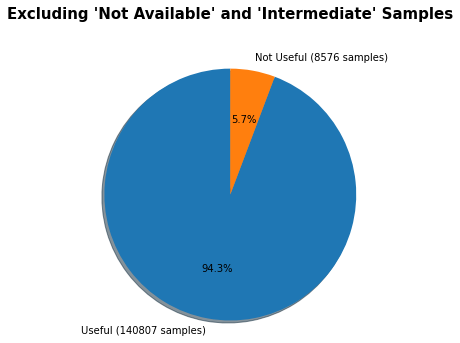

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Helpfulness_indicator"].value_counts()[k]} samples)' for k in ['Useful','Not Useful']]
sizes = dict(df['Helpfulness_indicator'].value_counts())
sizes.pop('Not Available')
sizes.pop('Intermediate')
sizes = sizes.values()

fig1, ax1 = plt.subplots(figsize=(5,5));
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Excluding 'Not Available' and 'Intermediate' Samples", pad=40, fontweight='bold', fontsize=15)
plt.show();

### Observations:
* Ignoring 'Not Available' and 'Intermediate'(Since we want to be sure of the fact that it is useful/non-useful) Datapoints, if we look at the count of 'Useful' and 'Not Useful' we can see that **94.3%** of reviews are Useful and **5.7%** are Not Useful

## Assigning 'Sentiment_Class' Feature

Score > 3 (4,5) -> Positive  
Score < 3 (1,2) -> Negative  

In [ ]:
df.loc[df["Score"] > 3, 'Sentiment_Class'] = 'Positive'
df.loc[df["Score"] < 3, 'Sentiment_Class'] = 'Negative'

In [ ]:
with pd.option_context('display.max_colwidth', -1):
    display(df.head(2))

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_indicator,Sentiment_Class
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Useful,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Available,Negative


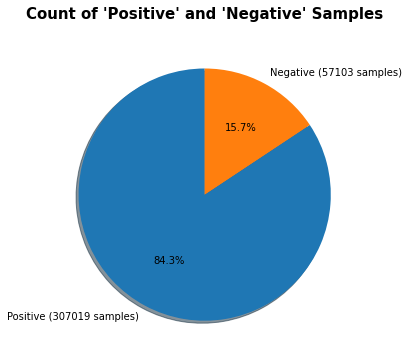

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = [f'{k} ({df["Sentiment_Class"].value_counts()[k]} samples)' for k in df['Sentiment_Class'].value_counts().keys()]
sizes = dict(df['Sentiment_Class'].value_counts())
sizes = sizes.values()

fig1, ax1 = plt.subplots(figsize=(5,5));
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Count of 'Positive' and 'Negative' Samples", pad=40, fontweight='bold', fontsize=15)
plt.show();

### Observation
* **Positive reviews are more common than negative reviews.**

## Assigning 'Review_Word_Count' Feature

In [ ]:
%%time
df["Review_Word_Count"] = df["Text"].apply(lambda x: len(x.split()))
with pd.option_context('display.max_colwidth', -1):
    display(df.head(2))

,Id,ProductId,UserId,ProfileName,Score,Time,Summary,Text,Helpfulness_indicator,Sentiment_Class,Review_Word_Count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than most.,Useful,Positive,48
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",Not Available,Negative,31


CPU times: user 1.8 s, sys: 5.79 ms, total: 1.8 s
Wall time: 1.81 s


# **EDA after Data Cleaning and Feature Engineering**

## What is the distribution of useful and non-useful reviews in each of the set of Positive and Negative Reviews.

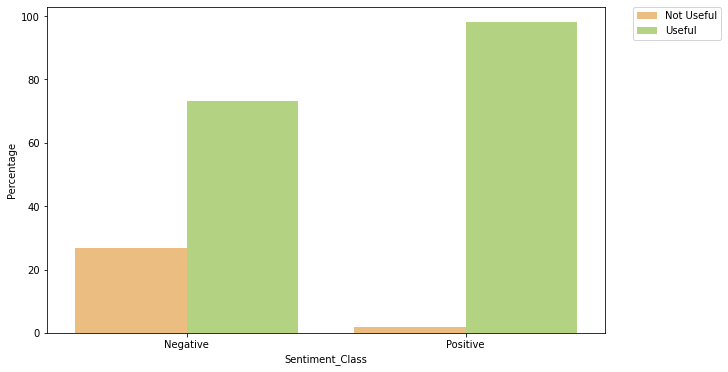

,Sentiment_Class,Helpfulness_indicator,Percentage
0,Negative,Useful,73.081516
1,Negative,Not Useful,26.918484
2,Positive,Useful,98.035875
3,Positive,Not Useful,1.964125


In [ ]:
df_temp = df[(df["Helpfulness_indicator"]!= "Not Available") & (df["Helpfulness_indicator"]!= "Intermediate")]
df_temp_1 = df_temp["Helpfulness_indicator"].groupby(df_temp["Sentiment_Class"]).value_counts(normalize=True)
df_temp_1 = df_temp_1*100
df_temp_1 = df_temp_1.rename("Percentage").reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_temp_1, x="Sentiment_Class", y="Percentage", hue="Helpfulness_indicator", hue_order=["Not Useful","Useful"], palette=sns.color_palette("RdYlGn", 2));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.show()
df_temp_1

### Observations
* **If we just look at Negative Reviews, a little more than quarter of the customers finding them non-useful(~27%)**.
    1. Some cases of Negative Reviews being non-helpful : This could be for reviews which talks about some situational things which the customers who are reading them may not be concerned about. (for eg. a review which talks about how pricey the product is (this review will be negative since the rating given was less than 3). But the customer reading them is willing to pay a premium for good quality, taste. So in such cases, they find it not useful.)
    2. Here, as we have seen earlier also reviews belonging to such cases are prevalent in our dataset.
* **If we just look at Positive Reviews, there are very very few customers finding them non-useful(~2%)**. 
    1. Some cases of Positive Reviews being non-helpful : This could be for reviews which doesn't explain in length/detail as to why the product is good(for example - "good", "best"). Or some reviews which may have been paid for by the brand itself, as we call paid reviews, which the customers prompty recognized by the tone of it.
    2. So we can safely say that our dataset doesn't have much - such kind of reviews.
* **So if we look at the above graph collectively, Most of the Customers find both Negative and Positive reviews useful (>94%) (presumably to make their purchase decisions).**

## What is the distribution of Positive and Negative Reviews in each of the set of useful and non-useful reviews

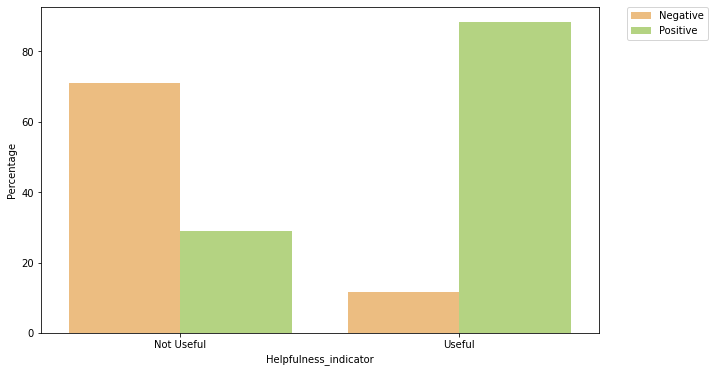

,Helpfulness_indicator,Sentiment_Class,Percentage
0,Not Useful,Negative,70.965485
1,Not Useful,Positive,29.034515
2,Useful,Positive,88.265498
3,Useful,Negative,11.734502


In [ ]:
df_temp = df[(df["Helpfulness_indicator"]!= "Not Available") & (df["Helpfulness_indicator"]!= "Intermediate")]
df_temp_1 = df_temp["Sentiment_Class"].groupby(df_temp["Helpfulness_indicator"]).value_counts(normalize=True)
df_temp_1 = df_temp_1*100 
df_temp_1 = df_temp_1.rename("Percentage").reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=df_temp_1, x="Helpfulness_indicator", y="Percentage", hue="Sentiment_Class", hue_order=["Negative","Positive"], palette=sns.color_palette("RdYlGn", 2));
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.show()
df_temp_1

### Observations
* If we just look at the reviews which are **non-useful**, we can see that the share of **negative** reviews are far more than the positive reviews. So, Users find the ***negative reviews to be less helpful*** in general.
* If we just look at the reviews which are **useful**, we can see that the share of **positive** reviews are far more than the negative reviews. So, Users find the ***positive reviews to be more helpful*** in general.

## Review Length vs. Review Usefulness

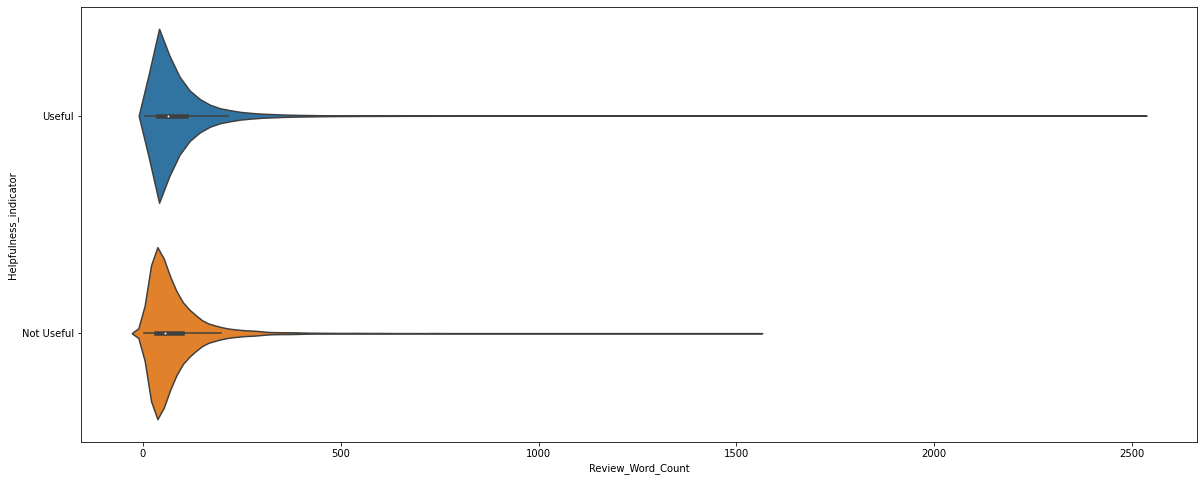

In [ ]:
temp_df_useful_nonuseful = df[(df["Helpfulness_indicator"]!= "Not Available") & (df["Helpfulness_indicator"]!= "Intermediate")]
plt.figure(figsize=(20,8))
sns.violinplot(x='Review_Word_Count', y='Helpfulness_indicator', data=temp_df_useful_nonuseful);

### Observations
* Since many outliers are there i.e. reviews with too many words are present, so in order to capture better co-relation between review length and ratings, we can consider reviews with 500 words or less.

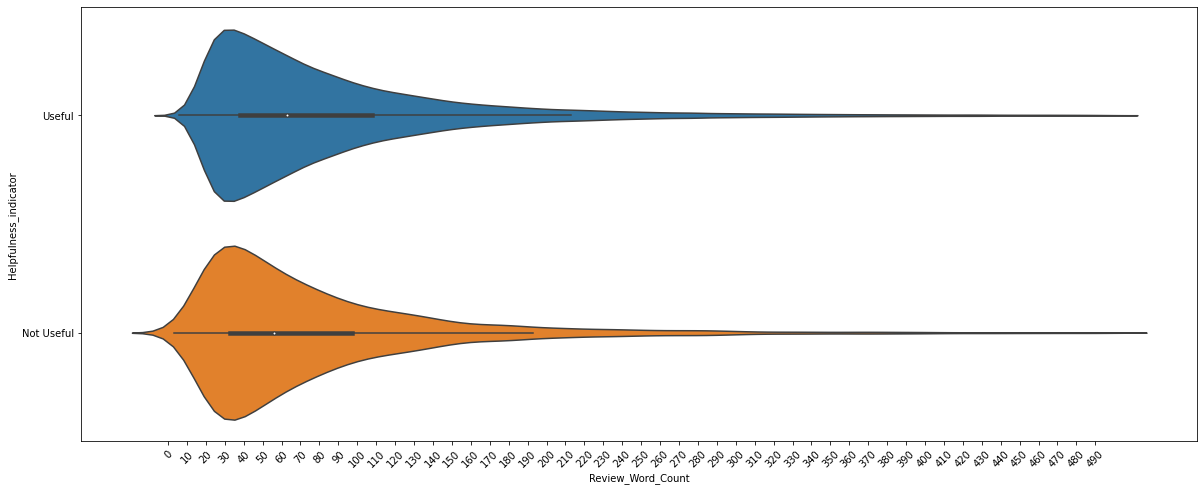

,count,mean,std,min,25%,50%,75%,max
Helpfulness_indicator,,,,,,,,
Not Useful,8509.0,77.757551,67.370230,3.0,33.0,56.0,97.0,495.0
Useful,139955.0,85.570283,71.000847,6.0,38.0,63.0,108.0,499.0


In [ ]:
temp_df_useful_nonuseful_500wc = df[(df["Helpfulness_indicator"]!= "Not Available") & (df["Helpfulness_indicator"]!= "Intermediate") & (df["Review_Word_Count"]<500)]
plt.figure(figsize=(20,8))
sns.violinplot(x='Review_Word_Count', y='Helpfulness_indicator', data=temp_df_useful_nonuseful_500wc, orient="h")
plt.xticks(range(0,500,10), rotation=45)
plt.show()
temp_df_useful_nonuseful_500wc["Review_Word_Count"].groupby(temp_df_useful_nonuseful_500wc["Helpfulness_indicator"]).describe()

### Observations
* Useful reviews are generally lengthier than non-useful reviews in terms of mean, median(50%), max, etc. (**Helpful reviews are longer**)
* Helpful reviews have a higher median word count(63 words) as compared to non-helpful's (56 words)
* There is a high concentration of reviews which are having a word count in the neighbourhood of 30.
* Distribution of both useful and non-useful reviews are more or less the same; follows the log-normal distribution which is inline with most human behaviours.

## Review Length vs. Review Sentiment

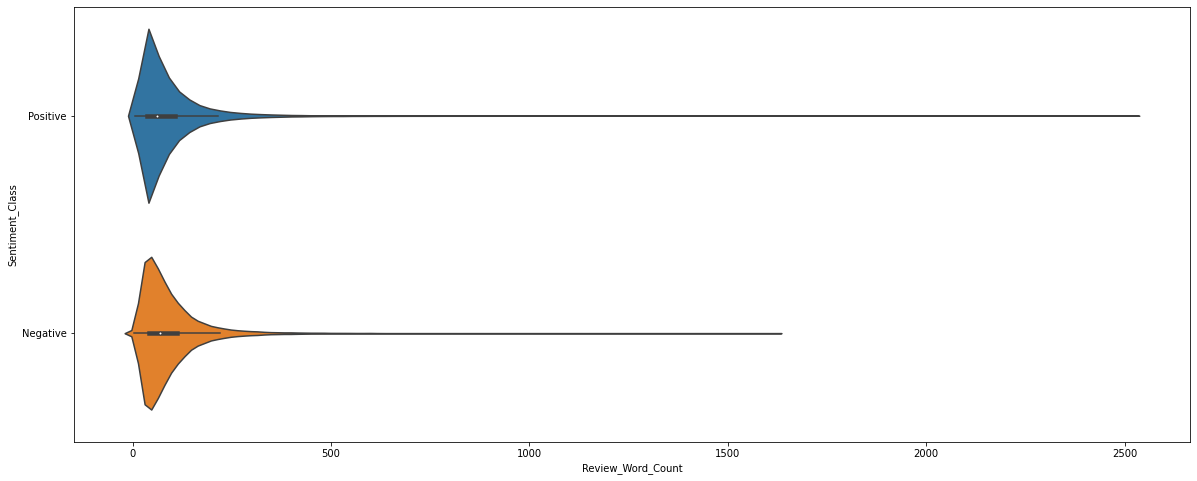

In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Review_Word_Count', y='Sentiment_Class', data=temp_df_useful_nonuseful);

### Observations
* Since many outliers are there i.e. reviews with too many words are present, so in order to capture better co-relation between review length and ratings, we can consider reviews with 500 words or less.
* The max length of a Positive review is much higher(\~2500)  as compared to Negative Review(\~1600)

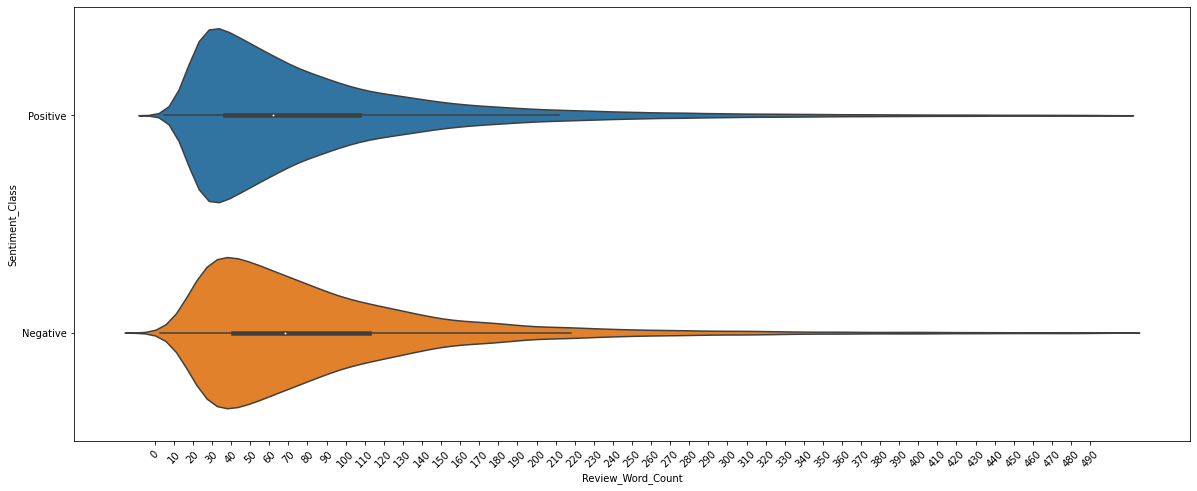

,count,mean,std,min,25%,50%,75%,max
Sentiment_Class,,,,,,,,
Negative,22471.0,88.182769,69.546710,3.0,41.0,68.0,112.0,497.0
Positive,125993.0,84.576707,71.032127,5.0,37.0,62.0,107.0,499.0


In [ ]:
plt.figure(figsize=(20,8))
sns.violinplot(x='Review_Word_Count', y='Sentiment_Class', data=temp_df_useful_nonuseful_500wc, orient="h")
plt.xticks(range(0,500,10), rotation=45)
plt.show()
temp_df_useful_nonuseful_500wc["Review_Word_Count"].groupby(temp_df_useful_nonuseful_500wc["Sentiment_Class"]).describe()

### Observations
* Negative reviews are generally lengthier than Positive reviews in terms of mean, 25th percentile, median(50th percentile), 75th percentile, etc. (**Positive Reviews are shorter**)
* The standard deviation is higher in case of Positive Reviews.

## EDA Observations (Consolidated)
1. Positive reviews are more common than negative reviews.
2. If we just look at Negative Reviews, a little more than quarter of the customers finding them non-useful(~27%)
3. If we just look at Positive Reviews, there are very very few customers finding them non-useful(~2%)
4. Most of the Customers find both Negative and Positive reviews useful (>94%) (presumably to make their purchase decisions).
5. Negative reviews are less helpful
6. Positive reviews are more helpful
7. Helpful reviews are longer
8. Positive Reviews are shorter

## EDA Conclusion
* Positive reviews are common
* Positive reviews are shorter (in terms of word count)
* Helpful reviews are longer.
* Despite being shorter, positive reviews are found to be more helpful.
